In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy
from sklearn import datasets,cross_validation,neighbors,metrics
%matplotlib inline

In [27]:
size = 500
X = sps.uniform.rvs(size=size) * 10
EPS = sps.norm.rvs(size=size,scale=0.2**0.5)
Y = 0.5 * X + 1 + EPS

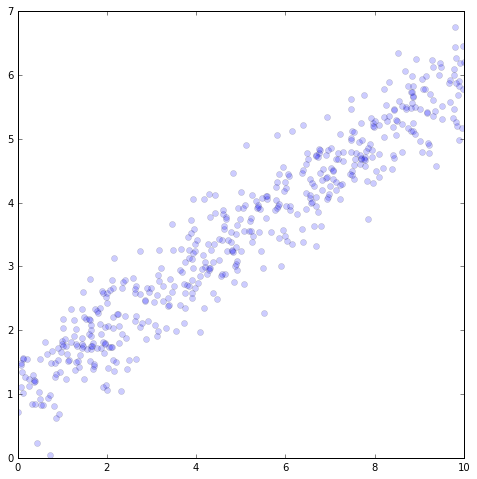

In [28]:
plt.figure(figsize=(8,8))
plt.plot(X,Y,'o',alpha=0.2)
plt.show()

In [34]:
def mse(params):
    return metrics.mean_squared_error(params[0] * X + params[1] , Y)
def mae(params):
    return metrics.mean_absolute_error(params[0] * X + params[1] , Y)

In [37]:
res_mse = scipy.optimize.minimize(mse,x0=[0,0])
res_mse

      fun: 0.19506790068282095
 hess_inv: array([[ 0.06092499, -0.30248693],
       [-0.30248693,  2.00181956]])
      jac: array([ -3.72529030e-09,  -7.45058060e-09])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.49455219,  1.03679543])

In [39]:
res_mae = scipy.optimize.minimize(mae,x0=[0,0])
res_mae

      fun: 0.35017308477553033
 hess_inv: array([[  8.89390437e-06,  -1.56639508e-06],
       [ -1.56639508e-06,   7.60487463e-06]])
      jac: array([ -3.72529030e-09,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 224
      nit: 18
     njev: 56
   status: 0
  success: True
        x: array([ 0.49011432,  1.06947819])

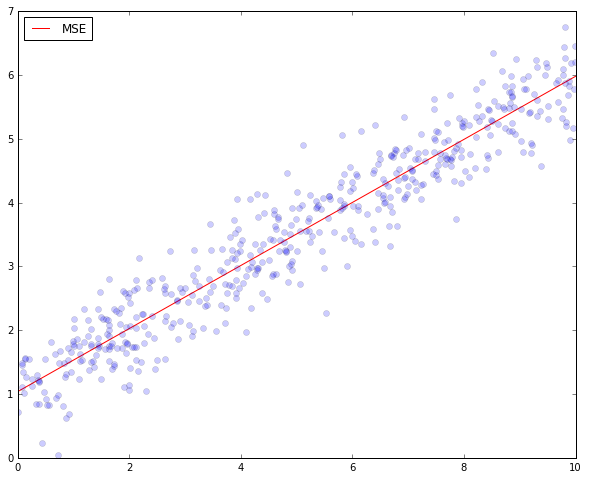

In [44]:
plt.figure(figsize=(10,8))
x_bnd = [0,10]
plt.plot(x_bnd,[res_mse.x[1],res_mse.x[1] + x_bnd[1]*res_mse.x[0]],color='red',label='MSE')
# plt.plot(x_bnd,[res_mae.x[1],res_mae.x[1] + x_bnd[1]*res_mae.x[0]],color='green',label='MAE')
plt.plot(X,Y,'o',alpha=0.2)
plt.legend(loc='best')
plt.show()

In [51]:
size2 = 75
X_shift = sps.uniform.rvs(size=size2) * 10
EPS = sps.norm.rvs(size=size2,scale=0.2**0.5)
Y_shift = -1 + EPS

In [52]:
X_all = np.array(list(X) + list(X_shift))
Y_all = np.array(list(Y) + list(Y_shift))

In [57]:
X = X_all
Y = Y_all

In [58]:
res_mse = scipy.optimize.minimize(mse,x0=[0,0])
res_mse

      fun: 2.7469199455638362
 hess_inv: array([[ 0.06109547, -0.30499123],
       [-0.30499123,  2.0225294 ]])
      jac: array([  1.19209290e-07,   1.49011612e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.42083548,  0.80995394])

In [59]:
res_mae = scipy.optimize.minimize(mae,x0=[0,0])
res_mae

      fun: 0.8949986319081735
 hess_inv: array([[ 0.00631613, -0.0246446 ],
       [-0.0246446 ,  0.0961779 ]])
      jac: array([ 0.01833247,  0.00165332])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 167
      nit: 10
     njev: 39
   status: 2
  success: False
        x: array([ 0.49229358,  0.97267733])

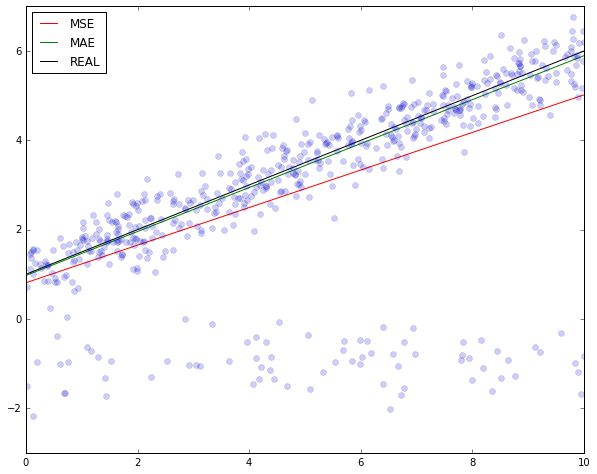

In [64]:
plt.figure(figsize=(10,8))
x_bnd = [0,10]
plt.plot(x_bnd,[res_mse.x[1],res_mse.x[1] + x_bnd[1]*res_mse.x[0]],color='red',label='MSE')
plt.plot(x_bnd,[res_mae.x[1],res_mae.x[1] + x_bnd[1]*res_mae.x[0]],color='green',label='MAE')
plt.plot(x_bnd,[1,1 + x_bnd[1]*0.5],color='black',label='REAL')
plt.plot(X,Y,'o',alpha=0.2)
plt.legend(loc='best')
plt.show()

In [62]:
print('error mse: ' + str([0.5,1] - res_mse.x))
print('error mae: ' + str([0.5,1] - res_mae.x))

error mse: [ 0.07916452  0.19004606]
error mae: [ 0.00770642  0.02732267]


Из полученных результатов можно сделать вывод, что MAE более устойчива к выбросам, чем MSE. 